# Credit Scoring  


## Assess potential loan customer's creditworthiness

## Background

A fintech company has collected historical data of their loan customers.
Machine learning based credit scoring is required to categorize the "good" customers from the "bad".


## Columns description

- Feature_X: feature of a customer, represented in numerical format.


    - E.g: loan size, job_code. 
    - Data dictionary or definition of the features are available.

        - Target: good customer is 0 | bad customer = 1



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

from sklearn import set_config
set_config(print_changed_only=False)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('InputData.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)

### Checking Missing Values (NaN)

In [3]:
df.isna().sum()

feature_1       0
feature_2       0
feature_3       0
feature_4       0
feature_5       0
               ..
feature_1042    0
feature_1043    2
feature_1044    2
feature_1045    2
target          0
Length: 1046, dtype: int64

#### Since there is no further informations about these missing values, so these values would be dropped, otherwise we can fill with certain value or with either, mean, median, or modes. 

Similarly, bfill, backfill and pad methods can also be used.



In [4]:
df.dropna(inplace=True)

#df.fillna(method ='mean', inplace = True) => For Example

df.isna().sum()

feature_1       0
feature_2       0
feature_3       0
feature_4       0
feature_5       0
               ..
feature_1042    0
feature_1043    0
feature_1044    0
feature_1045    0
target          0
Length: 1046, dtype: int64

# Checking target columns

col_0       count
target           
0       96.296296
1        3.703704


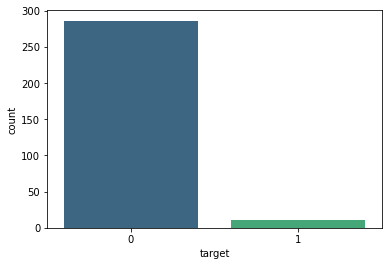

In [5]:
df["target"].value_counts()

print(pd.crosstab(index=df['target'],columns='count',normalize=True)*100)

ax = sns.countplot(x=df['target'], data=df, palette='viridis')

plt.show()

### 96,3% customers are good (0)
### 3.7% customers are bad (1)

##### The target column is imbalanced, so it is needed to be handled properly. In this case, SMOTE will be applied

## SPLITING DATA

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score,roc_auc_score, recall_score, precision_score, accuracy_score

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size = .8, random_state=42)

### Checking shape of X_train and X_test 

In [7]:
X_train.shape

(237, 1045)

In [8]:
X_test.shape

(60, 1045)

# Target Engineering

## Handling Imbalanced Data

### SMOTE: Synthetic Minority Oversampling Technique

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

In [9]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [10]:
X_train_sm.shape

(456, 1045)

In [11]:
y_train_sm.shape

(456,)

# FEATURE SELECTION - **DROPPING CONSTANT FEATURES**


### Since there are over 1000 columns, certain method needs to be applied. In this case **Variance Threshold**  is used.


### Feature selector that removes all low-variance features.

- This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.


- Drop all columns that are either constant, or close to constant for numerics, and columns that have only one value for factors or ordered columns.


- The threshold number is 0

In [12]:
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0.0)
constant_filter.fit(X_train_sm)

VarianceThreshold(threshold=0.0)

**Features that has 0 variances will be eliminated**

In [13]:
SUM_constant_filter=len(X_train_sm.columns[constant_filter.get_support()])

print(f'SUM of constant filter: {SUM_constant_filter}')

SUM of constant filter: 837


### Showing which are those constant features

In [14]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]

print(f'Constant Features SUM: {len(constant_columns)}\n\n')

for column in constant_columns:
    print(column)

Constant Features SUM: 208


feature_7
feature_101
feature_119
feature_120
feature_126
feature_128
feature_146
feature_171
feature_217
feature_222
feature_223
feature_224
feature_225
feature_235
feature_236
feature_237
feature_247
feature_250
feature_251
feature_253
feature_261
feature_262
feature_263
feature_264
feature_266
feature_270
feature_271
feature_272
feature_278
feature_279
feature_280
feature_281
feature_282
feature_283
feature_288
feature_311
feature_312
feature_313
feature_314
feature_315
feature_316
feature_317
feature_318
feature_321
feature_322
feature_323
feature_324
feature_327
feature_328
feature_329
feature_330
feature_349
feature_350
feature_351
feature_352
feature_355
feature_356
feature_357
feature_358
feature_359
feature_360
feature_361
feature_362
feature_363
feature_364
feature_375
feature_376
feature_377
feature_378
feature_381
feature_382
feature_383
feature_392
feature_393
feature_394
feature_395
feature_398
feature_399
feature_412
feature_413
feature_416
f

In [15]:
train_features = constant_filter.transform(X_train)
test_features = constant_filter.transform(X_test)

print(train_features.shape, test_features.shape)

(237, 837) (60, 837)


#### Dropping these constant features from X_train

In [16]:
X_train_sm.drop(constant_columns,axis=1)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_8,feature_9,feature_10,feature_11,...,feature_1036,feature_1037,feature_1038,feature_1039,feature_1040,feature_1041,feature_1042,feature_1043,feature_1044,feature_1045
0,1.000000e+06,-999.000000,2.100000e+07,3000000.0,28,0,263.000000,89.022731,94.000000,263.000000,...,82.000000,4.000000,0.0,1.000000,86.000000,1,2,4.000000,4.0,4.0
1,1.500000e+06,-999.000000,4.000000e+06,500000.0,22,0,263.000000,0.719261,1.000000,263.000000,...,31.000000,13.000000,0.0,0.000000,22.000000,0,1,4.000000,0.0,0.0
2,1.500000e+06,-999.000000,5.500000e+06,-999.0,27,0,269.000000,761.542396,87.000000,269.000000,...,62.000000,32.000000,0.0,0.000000,71.000000,0,1,6.000000,1.0,1.0
3,9.000000e+05,800000.000000,3.850000e+06,-999.0,36,0,252.000000,0.564729,1.000000,252.000000,...,71.000000,6.000000,0.0,1.000000,66.000000,0,1,2.000000,0.0,0.0
4,1.500000e+06,-999.000000,8.000000e+06,1500000.0,32,0,333.000000,0.266685,1.000000,333.000000,...,16.000000,5.000000,0.0,0.000000,22.000000,1,3,2.000000,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,1.893217e+06,-999.000000,4.069979e+06,-999.0,27,0,366.366020,30.953829,9.044317,366.366020,...,26.413696,17.572868,0.0,0.000000,88.650775,0,1,2.071189,0.0,0.0
452,8.405122e+05,340193.528198,4.962049e+06,-999.0,27,0,265.940636,133.770830,37.044246,265.940636,...,30.199075,46.051218,0.0,0.000000,79.792780,0,1,1.637951,0.0,0.0
453,3.844875e+06,-999.000000,6.844875e+06,-999.0,34,1,243.551247,0.673893,1.000000,243.551247,...,56.692519,13.343491,0.0,0.844875,83.329638,0,2,7.069252,0.0,0.0
454,1.976728e+06,10660.216532,4.525599e+06,-999.0,26,0,271.138938,0.238406,1.000000,271.138938,...,115.370271,13.163597,0.0,0.000000,90.976728,0,1,3.930184,0.0,0.0


# MODELING

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## KNN Classifier

              precision    recall  f1-score   support

           0       1.00      0.55      0.71        58
           1       0.07      1.00      0.13         2

    accuracy                           0.57        60
   macro avg       0.54      0.78      0.42        60
weighted avg       0.97      0.57      0.69        60



acc score:  0.5666666666666667
recall score:  1.0
precision score:  0.07142857142857142
f1 score:  0.13333333333333333


train accuracy KNN base:  0.8618421052631579
test accuracy KNN base:  1.0


       Pred 1  Pred 0
Akt 1       2       0
Akt 0      26      32


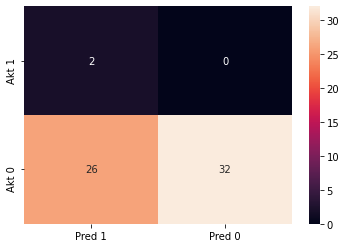

In [18]:
KNN = KNeighborsClassifier()

KNN.fit(X_train_sm, y_train_sm)

KNN_predict = KNN.predict(X_test)

print(classification_report(y_test, KNN_predict))

acc_base_KNN = accuracy_score(y_test, KNN_predict)
recall_base_KNN = recall_score(y_test, KNN_predict)
precision_base_KNN = precision_score(y_test, KNN_predict)
f1_base_KNN = f1_score(y_test, KNN_predict)


print('\n\nacc score: ', acc_base_KNN)
print('recall score: ', recall_base_KNN)
print('precision score: ', precision_base_KNN)
print('f1 score: ', f1_base_KNN)

print('\n\ntrain accuracy KNN base: ', KNN.score(X_train_sm, y_train_sm))
print('test accuracy KNN base: ', KNN.score(X_test, KNN_predict))
print()
print()

KNN_CM = confusion_matrix(y_test, KNN_predict, labels=[1 , 0])
print(pd.DataFrame(data=KNN_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"]))

KNN_DF = pd.DataFrame(data=KNN_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
sns.heatmap(KNN_DF, annot=True)
plt.show()

## Logistic Regression 

              precision    recall  f1-score   support

           0       0.96      0.86      0.91        58
           1       0.00      0.00      0.00         2

    accuracy                           0.83        60
   macro avg       0.48      0.43      0.45        60
weighted avg       0.93      0.83      0.88        60



acc score:  0.8333333333333334
recall score:  0.0
precision score:  0.0
f1 score:  0.0


train accuracy LogReg base:  0.8179824561403509
test accuracy LogReg base:  1.0


       Pred 1  Pred 0
Akt 1       0       2
Akt 0       8      50


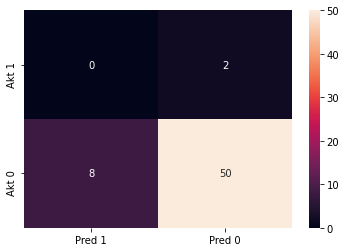

In [19]:
LogReg = LogisticRegression()

LogReg.fit(X_train_sm, y_train_sm)

LogReg_predict = LogReg.predict(X_test)

print(classification_report(y_test, LogReg_predict))

acc_base_LogReg = accuracy_score(y_test, LogReg_predict)
recall_base_LogReg = recall_score(y_test, LogReg_predict)
precision_base_LogReg= precision_score(y_test, LogReg_predict)
f1_base_LogReg = f1_score(y_test, LogReg_predict)


print('\n\nacc score: ', acc_base_LogReg)
print('recall score: ', recall_base_LogReg)
print('precision score: ', precision_base_LogReg)
print('f1 score: ', f1_base_LogReg)

print('\n\ntrain accuracy LogReg base: ', LogReg.score(X_train_sm, y_train_sm))
print('test accuracy LogReg base: ', LogReg.score(X_test, LogReg_predict))
print()
print()

LogReg_CM = confusion_matrix(y_test, LogReg_predict, labels=[1 , 0])
print(pd.DataFrame(data=LogReg_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"]))

LogReg_DF = pd.DataFrame(data=LogReg_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
sns.heatmap(LogReg_DF, annot=True)
plt.show()

## Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.98      0.86      0.92        58
           1       0.11      0.50      0.18         2

    accuracy                           0.85        60
   macro avg       0.55      0.68      0.55        60
weighted avg       0.95      0.85      0.89        60



acc score:  0.85
recall score:  0.5
precision score:  0.1111111111111111
f1 score:  0.1818181818181818


train accuracy DT base:  1.0
test accuracy DT base:  1.0


       Pred 1  Pred 0
Akt 1       1       1
Akt 0       8      50


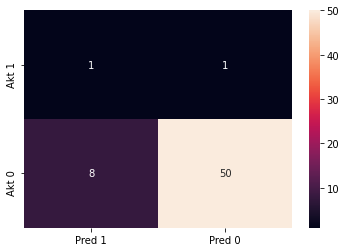

In [20]:
DT = DecisionTreeClassifier()

DT.fit(X_train_sm, y_train_sm)

DT_predict = DT.predict(X_test)

print(classification_report(y_test, DT_predict))

acc_base_DT = accuracy_score(y_test, DT_predict)
recall_base_DT = recall_score(y_test, DT_predict)
precision_base_DT= precision_score(y_test, DT_predict)
f1_base_DT = f1_score(y_test, DT_predict)


print('\n\nacc score: ', acc_base_DT)
print('recall score: ', recall_base_DT)
print('precision score: ', precision_base_DT)
print('f1 score: ', f1_base_DT)

print('\n\ntrain accuracy DT base: ', DT.score(X_train_sm, y_train_sm))
print('test accuracy DT base: ', DT.score(X_test, DT_predict))
print()
print()

DT_CM = confusion_matrix(y_test, DT_predict, labels=[1 , 0])
print(pd.DataFrame(data=DT_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"]))

DT_DF = pd.DataFrame(data=DT_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
sns.heatmap(DT_DF, annot=True)
plt.show()

## Random Forest Classifier

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       0.00      0.00      0.00         2

    accuracy                           0.97        60
   macro avg       0.48      0.50      0.49        60
weighted avg       0.93      0.97      0.95        60



acc score:  0.9666666666666667
recall score:  0.0
precision score:  0.0
f1 score:  0.0


train accuracy RF base:  1.0
test accuracy RF base:  1.0


       Pred 1  Pred 0
Akt 1       0       2
Akt 0       0      58


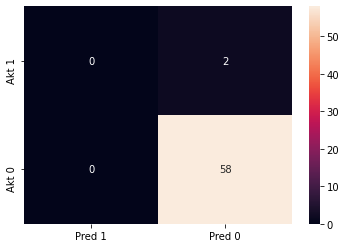

In [21]:
RF = RandomForestClassifier()

RF.fit(X_train_sm, y_train_sm)

RF_predict = RF.predict(X_test)

print(classification_report(y_test, RF_predict))

acc_base_RF = accuracy_score(y_test, RF_predict)
recall_base_RF = recall_score(y_test, RF_predict)
precision_base_RF = precision_score(y_test, RF_predict)
f1_base_RF = f1_score(y_test, RF_predict)


print('\n\nacc score: ', acc_base_RF)
print('recall score: ', recall_base_RF)
print('precision score: ', precision_base_RF)
print('f1 score: ', f1_base_RF)

print('\n\ntrain accuracy RF base: ', RF.score(X_train_sm, y_train_sm))
print('test accuracy RF base: ', RF.score(X_test, RF_predict))
print()
print()

RF_CM = confusion_matrix(y_test, RF_predict, labels=[1 , 0])
print(pd.DataFrame(data=RF_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"]))

RF_DF = pd.DataFrame(data=RF_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
sns.heatmap(RF_DF, annot=True)
plt.show()

## XG Boost Classifier

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        58
           1       0.33      0.50      0.40         2

    accuracy                           0.95        60
   macro avg       0.66      0.73      0.69        60
weighted avg       0.96      0.95      0.95        60



acc score:  0.95
recall score:  0.5
precision score:  0.3333333333333333
f1 score:  0.4


train accuracy XGB base:  1.0
test accuracy XGB base:  1.0


       Pred 1  Pred 0
Akt 1       1       1
Akt 0       2      56


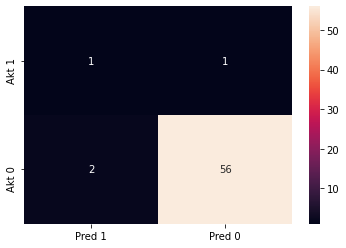

In [22]:
XGB = XGBClassifier()

XGB.fit(X_train_sm, y_train_sm)

XGB_predict = XGB.predict(X_test)

print(classification_report(y_test, XGB_predict))

acc_base_XGB = accuracy_score(y_test, XGB_predict)
recall_base_XGB = recall_score(y_test, XGB_predict)
precision_base_XGB= precision_score(y_test, XGB_predict)
f1_base_XGB = f1_score(y_test, XGB_predict)


print('\n\nacc score: ', acc_base_XGB)
print('recall score: ', recall_base_XGB)
print('precision score: ', precision_base_XGB)
print('f1 score: ', f1_base_XGB)

print('\n\ntrain accuracy XGB base: ', XGB.score(X_train_sm, y_train_sm))
print('test accuracy XGB base: ', XGB.score(X_test, XGB_predict))
print()
print()

XGB_CM = confusion_matrix(y_test, XGB_predict, labels=[1 , 0])
print(pd.DataFrame(data=XGB_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"]))

XGB_DF = pd.DataFrame(data=XGB_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
sns.heatmap(XGB_DF, annot=True)
plt.show()

In [26]:
data = {
    "K Nearest Neighbors" : [acc_base_KNN, precision_base_KNN, recall_base_KNN, f1_base_KNN,(KNN.score(X_train, y_train))],
    "Logistic Regression" : [acc_base_LogReg, precision_base_LogReg, recall_base_LogReg, f1_base_LogReg,LogReg.score(X_train, y_train)],
    "Decission Tree" : [acc_base_DT, precision_base_DT, recall_base_DT, f1_base_DT,DT.score(X_train, y_train)],
    "Random Forest"  : [acc_base_RF, precision_base_RF, recall_base_RF, f1_base_RF,RF.score(X_train, y_train)],
    "XG Boost" : [acc_base_XGB, precision_base_XGB, recall_base_XGB, f1_base_XGB,XGB.score(X_train, y_train)]
}

print('Model Score Comparison:\n\n',pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score','Train Model Accuracy']).T)

Model Score Comparison:

                      Accuracy  Precision  Recall  F1 Score  \
K Nearest Neighbors  0.566667   0.071429     1.0  0.133333   
Logistic Regression  0.833333   0.000000     0.0  0.000000   
Decission Tree       0.850000   0.111111     0.5  0.181818   
Random Forest        0.966667   0.000000     0.0  0.000000   
XG Boost             0.950000   0.333333     0.5  0.400000   

                     Train Model Accuracy  
K Nearest Neighbors              0.801688  
Logistic Regression              0.810127  
Decission Tree                   1.000000  
Random Forest                    1.000000  
XG Boost                         1.000000  


# Confusion Matrix for Classification Model

- Accuracy is literally how good our model is at predicting the correct category (classes or labels). If our dataset is pretty balanced and every category has equal importance, this should be our go-to metric to measure our model’s performance.


- Precision is the ratio of what our model predicted correctly to what our model predicted. For each category/class, there is one precision value. We focus on precision when we need our predictions to be correct, i.e. ideally we want to make sure our model is right when it predicts a label. 
For example, if we have a Loan underwriting model that predicts whether to approve or reject a loan request, our priority is being right for all those cases where our model predicted to approve the loan as we will lose money when it approved a loan ideally it should reject. We don’t lose money when it tells us to reject the loan as we still have that money with us.


- Recall is the ratio of what our model predicted correctly to what the actual labels are. Similar to precision, for each category/class, there is one recall value. We focus on recall when we have a FOMO(Fear Of Missing Out ) situation. Ideally, you want the model to capture all examples of a particular class. For example, airport security scanning machines have to make sure the detectors don’t miss any actual bombs/dangerous items, and hence we are okay with sometimes stopping the wrong bag/traveler.


- F1 score is used, if we want our model to have a balanced precision and recall score, we average them to get a single metric. Here comes, F1 score, the harmonic mean of recall & precision.

# Summary


- There is little value of either True Positive or False Positive on each models.


- Precision Score from classification report is being used, in order to minimize False Positive, which we don't predict bad customer as good customer, because the risk of losing money is higher.


- Since XGB Model has the highest precision score, in this case XG Boost model will be selected


- To increase the score of the mode, dataset that has high variance, so it will be good if the selected features in the dataset which has variance more than a fix threshold.

# Export Model

In [24]:
import joblib

In [25]:
joblib.dump(XGB,'Credit Scoring XGB Model')

['Credit Scoring XGB Model']